In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
df=pd.read_csv('Housing_data.csv')
df1=pd.read_csv('Housing_data.csv')
print(df.head())

   Unnamed: 0    price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0           1  42000.0     5850         3        1        2      yes      no   
1           2  38500.0     4000         2        1        1      yes      no   
2           3  49500.0     3060         3        1        1      yes      no   
3           4  60500.0     6650         3        1        2      yes     yes   
4           5  61000.0     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  


In [36]:
df1.drop(['Unnamed: 0','price','stories','driveway','recroom','fullbase','gashw','airco','garagepl','prefarea'],axis=1,inplace=True)

In [37]:
X1=df1['lotsize'].to_numpy()
Y1=df1['bedrooms'].to_numpy()
Z1=df1['bathrms'].to_numpy()
X=df1.to_numpy()

In [38]:
y=df['price'].to_numpy()
print(y)

[ 42000.  38500.  49500.  60500.  61000.  66000.  66000.  69000.  83800.
  88500.  90000.  30500.  27000.  36000.  37000.  37900.  40500.  40750.
  45000.  45000.  48500.  65900.  37900.  38000.  42000.  42300.  43500.
  44000.  44500.  44900.  45000.  48000.  49000.  51500.  61000.  61000.
  61700.  67000.  82000.  54500.  66500.  70000.  82000.  92000.  38000.
  44000.  41000.  43000.  48000.  54800.  55000.  57000.  68000.  95000.
  38000.  25000.  25245.  56000.  35500.  30000.  48000.  48000.  52000.
  54000.  56000.  60000.  60000.  67000.  47000.  70000.  45000.  51000.
  32500.  34000.  35000.  36000.  45000.  47000.  55000.  63900.  50000.
  35000.  50000.  43000.  55500.  57000.  60000.  78000.  35000.  44000.
  47000.  58000. 163000. 128000. 123500.  39000.  53900.  59900.  35000.
  43000.  57000.  79000. 125000. 132000.  58000.  43000.  48000.  58500.
  73000.  63500.  43000.  46500.  92000.  75000.  75000.  85000.  93000.
  94500. 106500. 116000.  61500.  80000.  37000.  5

In [39]:
def fitTheta(feature, theta):
    return np.dot(theta, feature)
def visualiseFeature(feature, featureLabel, thetaVal=None):
    fig = plt.figure(figsize=(20, 10))
    plt.rcParams.update({'font.size': 10})
    plt.xlabel(featureLabel, fontsize=15)
    plt.ylabel("Price", fontsize=15)
    plt.scatter(feature, y, color="red")
    if(thetaVal):
        thetaFit = fitTheta(feature, thetaVal)
        plt.plot(feature, thetaFit)

/home/amritansh/.local/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:761: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/amritansh/.local/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:763: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


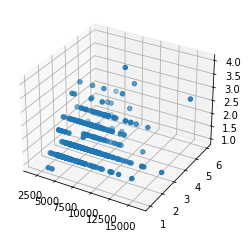

In [40]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(X1,Y1,Z1,y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
I=np.array([[0,0,0],[0,1000,0],[0,0,1000]])
firstTerm = np.linalg.inv(np.add(np.dot(X_train.T, X_train),I))
secondTerm = np.dot(X_train.T, y_train)
Theta = np.dot(firstTerm, secondTerm)
#print(y_test)

In [42]:
normal_predictions = np.dot(X_test, Theta)
print(normal_predictions)

[ 78472.9720202   94128.75755615  96218.0745277   68597.87260219
  51203.66195218  65339.59106833  56817.93167207  74262.26973029
  80879.08761444  53896.34752397  43584.29590377  49599.58488936
  64036.27845478 104956.27773022  39072.82916457  87662.32189664
  53208.75828072  90519.5841648   87008.82588819  64451.49219222
  77871.44312165  93543.262831    73139.41578631  53208.75828072
  64322.84843233  68648.0000104   52322.49910628  98409.48601736
  42682.00255593  64739.90187145  58085.31134913  69702.51528456
  53695.83789112  68549.58489565  59911.63650957  44001.34934288
  61329.39841127  46395.5997538   41743.7762716   48213.89133447
 109854.56926339  77484.61832767  69335.58925366  54411.81607783
  82324.59667266 116459.52196422  77985.8924098   35162.89132394
 142836.56416604 142148.97492279  75035.91931825  44099.76445763
  79676.02981732  97637.67613108  66829.218843    52105.95530002
  67244.43258043  48095.76264296 124203.36278244  81346.26846177
  49685.64523406  54401.7

In [43]:
n1=normal_predictions.astype(int)
a=np.subtract(y_test,normal_predictions)
b=np.absolute(a)
c=np.divide(b,y_test)
error=np.mean(c)
print(error)

0.25505356100265275


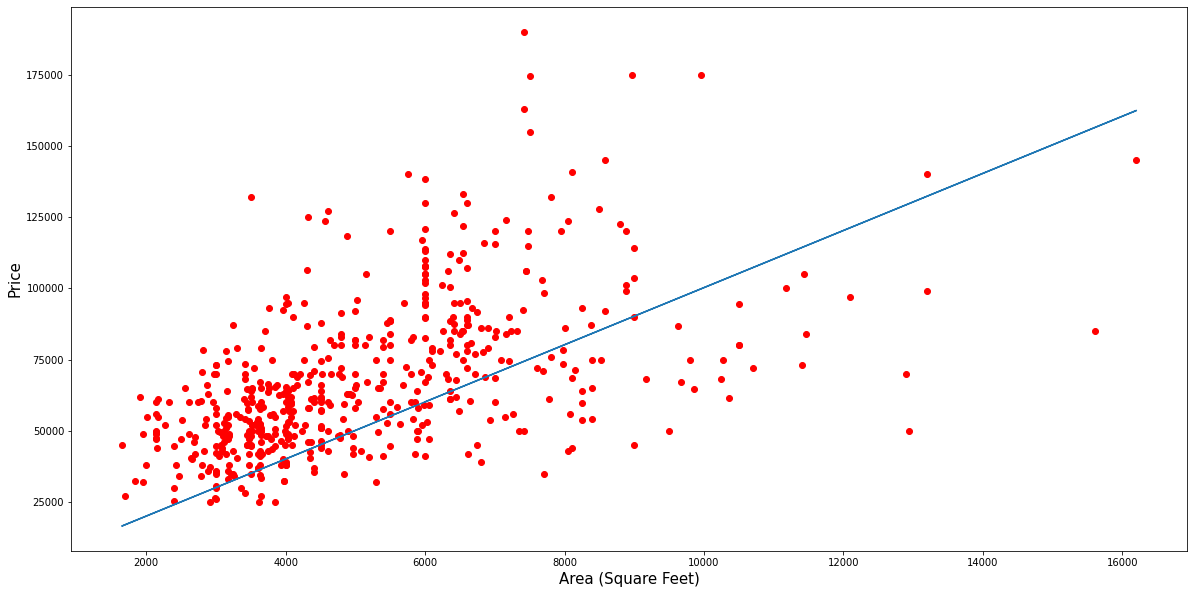

In [44]:
visualiseFeature(X1, "Area (Square Feet)", thetaVal=Theta[0])

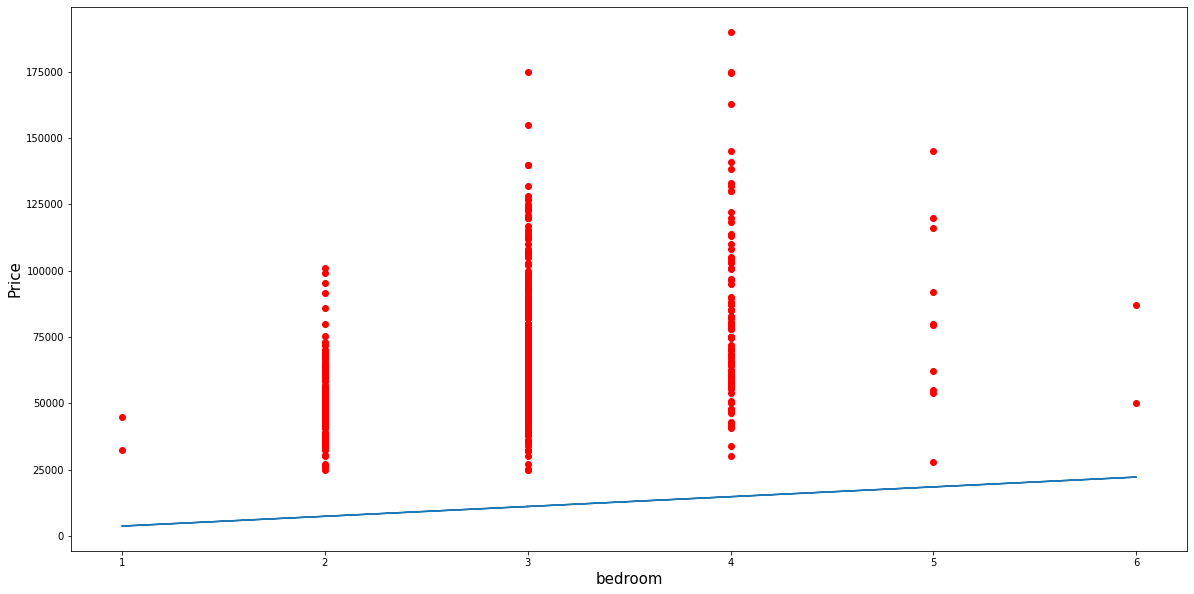

In [45]:
visualiseFeature(Y1, "bedroom", thetaVal=Theta[1])

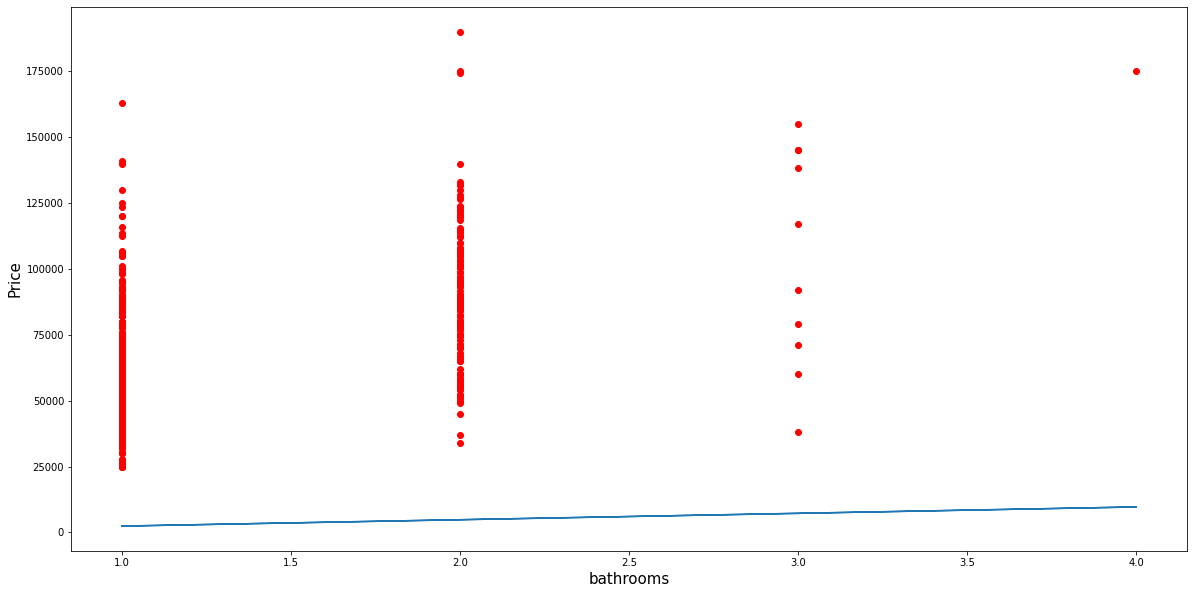

In [46]:
visualiseFeature(Z1, "bathrooms", thetaVal=Theta[2])

In [47]:
#on checking the accuracy second one is better